In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Activation,MaxPooling2D
import pickle
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [5]:

X=pickle.load(open("X.pickle","rb"))
Y=pickle.load(open("Y.pickle","rb"))

In [6]:
X=np.array(X/255.0)
Y=np.array(Y)

In [7]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(7))
model.add(Activation("softmax"))

In [8]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [10]:
model.fit(X,Y,epochs=10,validation_split=0.1)

Epoch 1/10
22/22 [==============================] - 1s 64ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 0.9211
Epoch 2/10
22/22 [==============================] - 1s 63ms/step - loss: 0.0174 - accuracy: 0.9985 - val_loss: 0.2048 - val_accuracy: 0.9211
Epoch 3/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.1950 - val_accuracy: 0.9342
Epoch 4/10
22/22 [==============================] - 1s 63ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2155 - val_accuracy: 0.9342
Epoch 5/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9342
Epoch 6/10
22/22 [==============================] - 1s 65ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2137 - val_accuracy: 0.9342
Epoch 7/10
22/22 [==============================] - 1s 65ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.9342
Epoch 8/10
22

In [12]:
model.save('C:/Users/Prathyushaa/Desktop/CNN.h5')

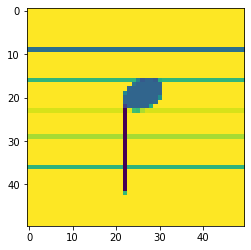

In [14]:
IMG_SIZE=50
CATEGORIES = ["Dha-2","Ni-2","Sa","Re-2","Ga-2","Ma-1","Pa"]
def prepare(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    plt.imshow(new_img)
    plt.show()
    return new_img.reshape(-1,IMG_SIZE,IMG_SIZE,1)

model= tf.keras.models.load_model("C:/Users/Prathyushaa/Desktop/CNN.h5")  
prediction=model.predict([prepare('C:/Users/Prathyushaa/Desktop/c4.jpeg')])

In [15]:
print(CATEGORIES[np.argmax(prediction)])

Sa
